Analyzing An Audio File
-------------

Christopher Tripp | Feb 2018

In [1]:
# python 2
import scipy.io.wavfile #for sound file
import pydub #for sound file
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's start by reading the mp3 file, turning it into a wav, and printing some basic info about the wav.

In [10]:
#music folder
temp_folder="/Users/myname/CompPhys/AudioProcessing/"
#test mp3 file
mp3_file="eqn.mp3"

#read mp3 file
mp3 = pydub.AudioSegment.from_mp3(temp_folder+mp3_file)
#convert to wav
mp3.export(temp_folder+"testfile.wav", format="wav")
#read wav file
rate,audData=scipy.io.wavfile.read(temp_folder+"testfile.wav")

print("The sampling rate (i.e. data points per second) is "+str(rate))
print("The type of the data stored in each datum is "+str(audData.dtype))
print("The total number of data points is "+str(audData.shape[0]))
print("The number of channels (i.e. is it mono or stereo) is "+str(audData.shape[1]))
print("The wav length is "+str(audData.shape[0] / rate)+" seconds")

#wav number of channels
channel1=audData[:,0] #left
channel2=audData[:,1] #right

#number of data points
N = audData.shape[0]

The sampling rate (i.e. data points per second) is 44100
The type of the data stored in each datum is int16
The total number of data points is 15308928
The number of channels (i.e. is it mono or stereo) is 2
The wav length is 347 seconds


Now let's make a basic plot of the amplitude as a function of time, making one plot for each of the 2 channels.

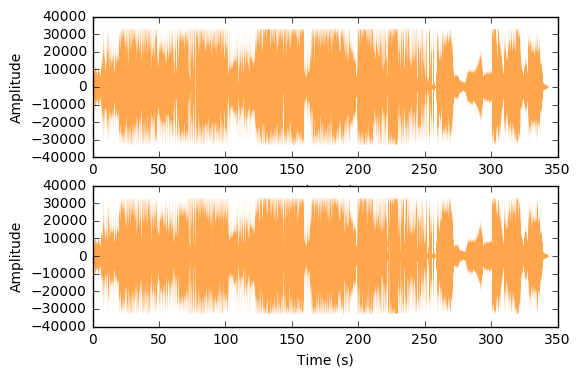

In [3]:
#create a time variable in seconds
time = np.arange(0, float(audData.shape[0]), 1)/rate

#plot amplitude (or loudness) over time
plt.figure(1)
plt.subplot(211)
plt.plot(time, channel1, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time, channel2, linewidth=0.01, alpha=0.7, color='#ff7f00')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

Now let's analyze the power spectrum (of just the left channel) using the FFT.  We note that there is an inherent limit on the resolution between different frequencies since the FFT takes in a signal over a finite time interval, and since it only calculates results for certain discrete frequency values (the "FFT bins").  Since most real signals will have discontinuities at the ends of the measured time, and the FFT assumes periodicity (that is, it assumes the signal repeats), it will most likely assume sharp discontinuities that are not really there.  And since sharp discontinuities have broad frequency spectra, these will cause the signal's frequency spectrum to spread out.  As a result, signal energy which should be concentrated only at one frequency instead leaks into all the other frequencies (this is known as "spectral leakage").  To reduce this effect, we can apply a tapering window function (in this case a Hanning window) which will smooth out any such discontinuity.

Let's make 2 plots of the power spectrum.  The first will just be made by directly applying the FFT, and the second will be made by first applying Hanning windowing before the FFT.

In [11]:
# generate frequency values
k = np.fft.rfftfreq(N)
#normalize them
freq = k/rate
#freq = np.arange(0, (N/2), 1.0) * (rate*1.0/N);

In [12]:
#fft to get the power
c1_power = (np.fft.rfft(channel1))
#c2_power = (np.fft.rfft(channel2))

#normalize (so that the length doesn't matter)
c1_power = c1_power/N
#c2_power = c2_power/N

In [13]:
#apply Hann window and take the FFT
win = np.hanning(N)
windowed_c1_power = (np.fft.rfft(win*channel1))
windowed_c1_power = windowed_c1_power/N

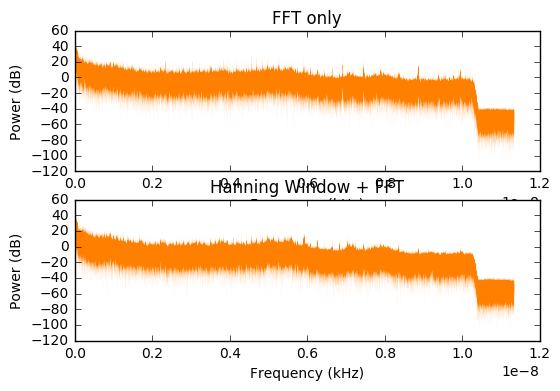

In [15]:
#plot power(in db) against frequency (in khz)
plt.figure(1)
plt.subplot(211)
plt.plot(freq/1000, 10*np.log10(c1_power**2), color='#ff7f00', linewidth=0.01)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.title('FFT only')
plt.subplot(212)
plt.plot(freq/1000, 10*np.log10(windowed_c1_power**2), color='#ff7f00', linewidth=0.01)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.title('Hanning Window + FFT')
plt.show()

That was fun!  Although it's a little hard to see, in many spots we can distinctly see that the second graph is much cleaner.  

Now let's do a spectogram.  This is essentially a heat map which shows the frequency in Hz and the intensity in DB in terms of time.

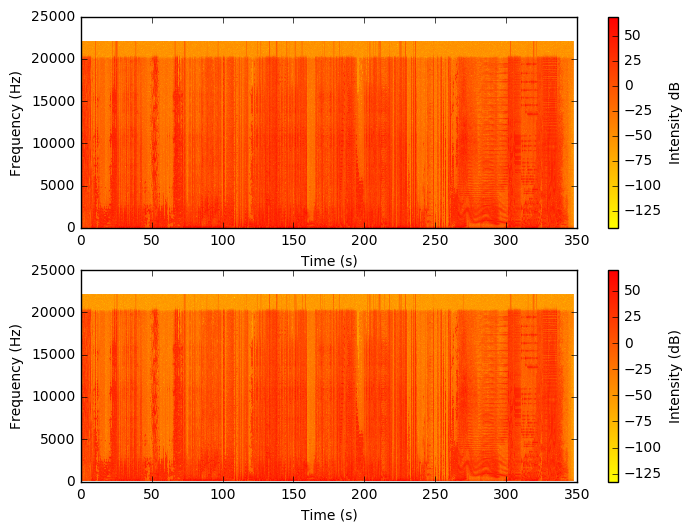

In [8]:
#spectogram
plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')
plt.subplot(212)
Pxx, freqs, bins, im = plt.specgram(channel2, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity (dB)')
#plt.show()


We can also output the file at half speed:

In [9]:
#save a file at half speed
scipy.io.wavfile.write(temp_folder+"file2.wav", rate/2, audData)